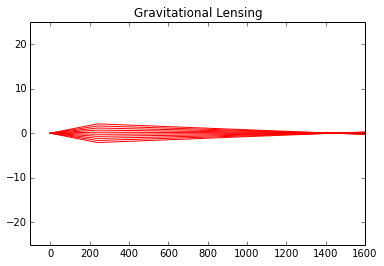

In [1]:
import numpy as np 

import matplotlib.pyplot as plt

def light_ray(source, lens, rays, location, focal, label='', color='b'):
    apa = lens*np.pi/180.0
    z0 = source[0]
    if (np.size(source) == 2): x0 = source[1]
    else:                  x0 = 0.0
 
    zl1, ff1 = location[(z0 < location)], focal[(z0 < location)]
    nl  = 1 
 
    zz, xx, tani = np.zeros(nl+2), np.zeros(nl+2), np.zeros(nl+2)
    tan0 = np.tan(apa/2.0) - np.tan(apa) * np.arange(rays)/(rays-1)
 
    for i in range(rays):
        tani[0] = tan0[i] 
        zz[0], xx[0] = z0, x0
        for j in range(nl):
            zz[j+1]   = zl1[j]
            xx[j+1]   = xx[j] + (zz[j+1]-zz[j]) * tani[j]
            tani[j+1] = tani[j] - xx[j+1] / ff1[j]
 
        zz[nl+1] = zmax
        xx[nl+1] = xx[nl] + (zz[nl+1]-zz[nl]) * tani[nl]
        plt.plot(zz, xx, color)
        
plt.clf()
 
zmin, zmax       = -100., 1600.
xmin, xmax       = -25, 25
bignum, smallnum = 1e6, 1e-6  

location = np.array([240.0]) 
focal = np.array([200.0]) 
 
xsrc, zsrc, zpup = 2.0 , 0.0, -bignum 
srcpos = (zsrc, xsrc)
 
light_ray((0.0, 0.),      1,  10, location, focal, 'src1', 'r')

plt.axis([zmin,zmax, xmin, xmax])
plt.title("Gravitational Lensing ")
plt.show()
        
